# Project 5 | Sentiment Analysis

### Connecting to Twitter API

In [122]:
import tweepy

# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN = '1507476365209223177-tT7Ur8dc3zTqinEuFF3YwP9nTcbWqY'
ACCESS_SECRET = 'z3cmW4PsR7SZtZG7harfHuBwFDYIss5No1XZbp9GJbr06'
CONSUMER_KEY = 'zkHL8gUupR20SVVlmlruqrk2N'
CONSUMER_SECRET = 'sMYG0dAjk1ojegzeYIUX24iw983IWoIhXAYmfSLDxTwTtiAFJf'


# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api


# Create API object
api = connect_to_twitter_OAuth()

### Adding variables for the program

In [123]:
positive_comments = []
negative_comments = []
neutral_comments = []

### Function to Clean Up Tweets

In [124]:
import re
def cleanTweet(tweet):
    # Remove Links, Special Characters etc from tweet
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

### Function to Calculate Percentage

In [125]:
def percentage( tweet, total_tweets):
    percentage = 100 * float(tweet) / float(total_tweets)
    return format(percentage, '.2f')

### Function to Find the Average for Reaction


In [126]:
def find_reaction_avg(positive, negative, neutral, total_tweets ):
        avg_positive = percentage(positive, total_tweets)

        avg_negative = percentage(negative, total_tweets)

        avg_neutral = percentage(neutral, total_tweets)

        return avg_positive, avg_negative, avg_neutral             

### Function to Process the Tweets

In [127]:
# Importing TextBlob
from textblob import TextBlob
def process_tweets(searchTweet, tweets, total_tweets):
    clean_tweetText = []
    polarity = 0
    positive = 0
    negative = 0
    neutral = 0

    for tweet in tweets:

        #Append to temp so that we can store in csv later. I use encode UTF-8
        clean_tweetText.append(cleanTweet(tweet.text).encode('utf-8'))

        # TextBlob object for sentiment analysis
        analysis = TextBlob(tweet.text)

        # Adding up polarities to find the average
        polarity += analysis.sentiment.polarity  


        # Analyzing and adding up people's reactions for each tweet
        if (analysis.sentiment.polarity == 0):  
            neutral += 1
            neutral_comments.append(cleanTweet(tweet.text))

        elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 1):
            positive += 1
            positive_comments.append(cleanTweet(tweet.text))

        elif (analysis.sentiment.polarity >= -1 and analysis.sentiment.polarity <= 0):
            negative += 1
            negative_comments.append(cleanTweet(tweet.text))   
    
    (avg_positive, avg_negative, avg_neutral) = find_reaction_avg(positive, negative, neutral, total_tweets )

    # Average Reaction
    polarity = polarity / total_tweets

    # Print Data
    print("People tweet's reactions to " + searchTweet + " by analyzing " + str(total_tweets) + " tweets.")
    print()


    print("General Report: Polarity " + str(polarity) )
    print()

    if (polarity == 0):
        print("--Neutral tweets--")
        print(neutral_comments)   
        for each in neutral_comments:
            print(each)
            print()

    elif (polarity > 0 and polarity <= 1):
        print("--Positive tweets--")
        for each in positive_comments:
            print(each)
            print()


    elif (polarity >= -1 and polarity <= 0):
        print("--Negative tweets--") 
        for each in negative_comments:
            print(each)
            print()

    print()
    print("Detailed Report: ")
    print(str(positive) + " people reacted positive")
    print(str(negative) + " people reacted negative")
    print(str(neutral) + " people reacted neutral")
    print(str(avg_positive) + "% people reacted positive")
    print(str(avg_negative) + "% people reacted negative")
    print(str(avg_neutral) + "% people reacted neutral")

    return (    positive, negative, neutral, 
                avg_positive, avg_negative, avg_neutral )


### Function to Plot Pie Chart

In [128]:
import matplotlib.pyplot as plt

def plotPie(values, names):
    colors = ['#B7C3F3', '#DD7596', '#8EB897']
    # Create a pieplot
    plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' } ,  colors=colors, autopct='%1.1f%%');
    plt.show();

## Search Tweets about Chris Rock

In [129]:
chris_tweets = api.search_tweets("@chrisrock", count=50) 
(positive, negative, neutral, avg_positive, avg_negative, avg_neutral) = process_tweets("@chrisrock", chris_tweets, len(chris_tweets) )



People tweet's reactions to @chrisrock by analyzing 39 tweets.

General Report: Polarity 0.14562121011583903

--Positive tweets--
Keep your head high You’ve won public opinion Your shows are rocking even more as you show compassio https://t.co/OeryTk2RGS

Good morning Chris Just wanted to compliment you on the 2009 Documentary “Good Hair. Thank you Be well ✌🏼🎵

Happy Easter https://t.co/qe6rL72PEM

Hello everyone are we getting acquainted?

_doodledude Me too He is already missed And he is right In a world woke deep in it https://t.co/PyovEZbrvT

My ex brother-in-law died at 52 from Covid in 2020 before vaccines were available The point https://t.co/3tA197N1YY

RT 🎤18 YEARS AGO TODAY!🎤 's comedy special 'Never Scared premiered on HBO on April 17 2004 https://t.co/4kN8dcfsIO

ATT HOLYWOOD IM LISTEN KING2THE MOST EXCITED2TALK2ME frOm heaVen EVER!Lol!THE CREATOR OF JEEZEE GILBERT https://t.co/7lYavQkTbn

RT Did #AdultHitler die peacefully in Oslo Norway? #elog #nft …

RT Did #AdultHitler 

### Plot Pie Chart for Chris Rock

[16, 2, 21]


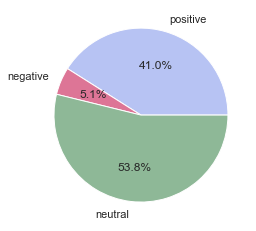

In [130]:
# Append to store data reactions
chris_values = []
chris_values.append(positive)
chris_values.append(negative)
chris_values.append(neutral)
print(chris_values)
# Plot pie chart
names = 'positive' , 'negative', 'neutral'
plotPie(chris_values, names)

*Chart shows that most of the comments towards Chris Rock are neutral*

## Get Jada P Smith Tweets

In [131]:
# tweets from a specific user
jada_tweets = api.search_tweets( "@jadapsmith" , count = 50)
(positive, negative, neutral, avg_positive, avg_negative, avg_neutral) = process_tweets("@jadapsmith", jada_tweets, len(jada_tweets) )

People tweet's reactions to @jadapsmith by analyzing 49 tweets.

General Report: Polarity 0.1419704700061843

--Positive tweets--
Keep your head high You’ve won public opinion Your shows are rocking even more as you show compassio https://t.co/OeryTk2RGS

Good morning Chris Just wanted to compliment you on the 2009 Documentary “Good Hair. Thank you Be well ✌🏼🎵

Happy Easter https://t.co/qe6rL72PEM

Hello everyone are we getting acquainted?

_doodledude Me too He is already missed And he is right In a world woke deep in it https://t.co/PyovEZbrvT

My ex brother-in-law died at 52 from Covid in 2020 before vaccines were available The point https://t.co/3tA197N1YY

RT 🎤18 YEARS AGO TODAY!🎤 's comedy special 'Never Scared premiered on HBO on April 17 2004 https://t.co/4kN8dcfsIO

ATT HOLYWOOD IM LISTEN KING2THE MOST EXCITED2TALK2ME frOm heaVen EVER!Lol!THE CREATOR OF JEEZEE GILBERT https://t.co/7lYavQkTbn

RT Did #AdultHitler die peacefully in Oslo Norway? #elog #nft …

RT Did #AdultHitler 

### Plot Pie Chart for Jada Smith

[16, 1, 32]


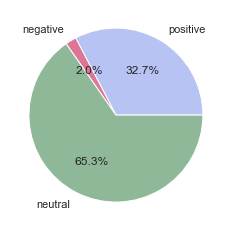

In [132]:
# Append to store data reactions
jada_values = []
jada_values.append(positive)
jada_values.append(negative)
jada_values.append(neutral)

# Plot pie chart
names = 'positive' , 'negative', 'neutral'
plotPie(jada_values, names)

*Chart shows that has few **negative** comments towards Jada Smith*

## Get Kim Kardashian Tweets

In [133]:
# tweets from a specific user
kim_tweets = api.search_tweets( "@KimKardashian" , count = 50)
(positive, negative, neutral, avg_positive, avg_negative, avg_neutral) = process_tweets("@KimKardashian", kim_tweets, len(kim_tweets) )



People tweet's reactions to @KimKardashian by analyzing 50 tweets.

General Report: Polarity 0.1334506944444445

--Positive tweets--
Keep your head high You’ve won public opinion Your shows are rocking even more as you show compassio https://t.co/OeryTk2RGS

Good morning Chris Just wanted to compliment you on the 2009 Documentary “Good Hair. Thank you Be well ✌🏼🎵

Happy Easter https://t.co/qe6rL72PEM

Hello everyone are we getting acquainted?

_doodledude Me too He is already missed And he is right In a world woke deep in it https://t.co/PyovEZbrvT

My ex brother-in-law died at 52 from Covid in 2020 before vaccines were available The point https://t.co/3tA197N1YY

RT 🎤18 YEARS AGO TODAY!🎤 's comedy special 'Never Scared premiered on HBO on April 17 2004 https://t.co/4kN8dcfsIO

ATT HOLYWOOD IM LISTEN KING2THE MOST EXCITED2TALK2ME frOm heaVen EVER!Lol!THE CREATOR OF JEEZEE GILBERT https://t.co/7lYavQkTbn

RT Did #AdultHitler die peacefully in Oslo Norway? #elog #nft …

RT Did #AdultHitl

### Plot Pie Chart for Kim Kardashian

[16, 9, 25]


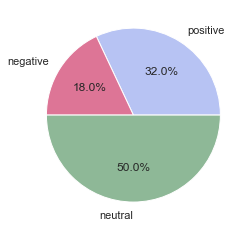

In [134]:
# Append to store data reactions
kim_values = []
kim_values.append(positive)
kim_values.append(negative)
kim_values.append(neutral)
# Plot pie chart
names = 'positive' , 'negative', 'neutral'
plotPie(kim_values, names)

*Chart shows that has a considerable **negative** comments towards Kim Kardashian*

## Data Visualization of Chris Rock, Jada Smith, and Kim Kardashian

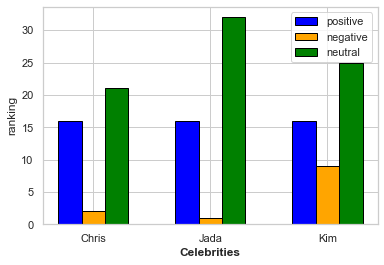

In [135]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# width of the bars
barWidth = 0.2
 
# Choose the height of the blue bars
bars1 = [ chris_values[0], jada_values[0], kim_values[0] ]
 
# Choose the height of the cyan bars
bars2 = [ chris_values[1], jada_values[1], kim_values[1] ]

bars3 = [ chris_values[2], jada_values[2], kim_values[2] ]
 

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black',  capsize=7, label='positive')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black',  capsize=7, label='negative')

# Create yellow bars
plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black',  capsize=7, label='neutral')

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Chris', 'Jada', 'Kim'])
plt.ylabel('ranking')
plt.legend()
plt.xlabel('Celebrities', fontweight='bold')

# Show graphic
plt.show()

*Chart shows that Kim Kardashian has greater **negative** comments than other celebrities*

## Data Visualization with Seaborn

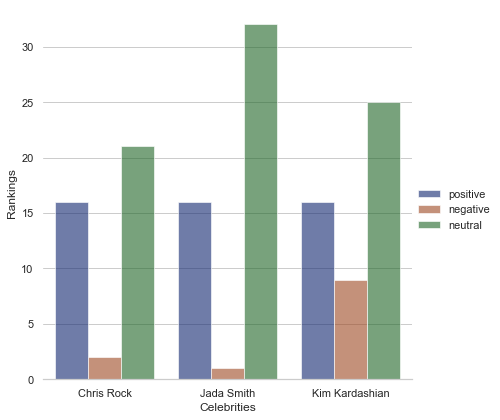

In [136]:
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")


data = {
    'celebrities' : ['Chris Rock', 'Chris Rock', 'Chris Rock','Jada Smith', 'Jada Smith', 'Jada Smith', 'Kim Kardashian' , 'Kim Kardashian' , 'Kim Kardashian'],
    'ranking' : [ chris_values[0], chris_values[1], chris_values[2], jada_values[0], jada_values[1], jada_values[2], kim_values[0], kim_values[1], kim_values[2],  ],
    'type' : [ 'positive' , 'negative' , 'neutral', 'positive' , 'negative' , 'neutral', 'positive' , 'negative' , 'neutral']
}
df = pd.DataFrame(data)


penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="celebrities", y="ranking", hue="type",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Celebrities", "Rankings")
g.legend.set_title("")

*Chart shows that Kim Kardashian has greater **negative** comments than other celebrities*

## Word Clouds


### Function to plot word cloud

In [137]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    import matplotlib.pyplot as plt
    # Set figure size
    plt.figure(figsize=(25, 15))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

### Function to create an object WordCloud and plot the Cloud

In [138]:

# Plot wordCloud
def wordCloud(list_words):
    # Import packages
    from wordcloud import WordCloud, STOPWORDS
    import numpy as np
    from PIL import Image

    mask = np.array(Image.open('user.png'))

    wordcloud = WordCloud(width = 1500, height = 1000, random_state=1, background_color='Navy', colormap='autumn', collocations=False, stopwords = STOPWORDS, mask = mask).generate(list_words)
    plot_cloud(wordcloud)


### Function to Process the Text

In [158]:
def process_tweet(tweets):
    text = []
    text = ''
    for tweet in tweets:
        text += tweet.text

    text = text.lower()           # Convert the whole text to lower case
    text = re.sub(u"[-()\"#$/@;:<>{}`+=~|!?,\â€“”\*]|\[.*\]|\d{1,}th|\d{1,}s|\d{1,}'s|\d{1,}", " ", text)
    list_words = re.split('[-\s—]', text)  # Split string with multiple delimiters: - , \s, — 

    list_words = [ (eachWord.strip('.,“”!;()-[]?,):\n"')) for eachWord in list_words]     # Cleaning the words from . , ! ; () [] “ ” ? ' 
    list_words = [ (eachWord.replace("’s" , '')) for eachWord in list_words]    # Replace 's from words with ''
    list_words = [ (eachWord.replace("’ll" , '')) for eachWord in list_words]    # Replace 'll from words ''
    list_words = [ (eachWord.replace("’t" , '')) for eachWord in list_words]    # Replace 't from words ''
    list_words = [ (eachWord.replace("'s" , '')) for eachWord in list_words]    # Replace 's from words with ''
    list_words = [ (eachWord.replace("'ll" , '')) for eachWord in list_words]    # Replace 'll from words ''
    list_words = [ (eachWord.replace("'t" , '')) for eachWord in list_words]    # Replace 't from words ''
    list_words = [ eachWord for eachWord in list_words if len(eachWord) > 4]    # Replace 't from words ''
    list_words = list(filter(None, list_words))         # Filter Null values or empty strings from the List  
    word_text = ' '.join(list_words)    # Convert List to String
    return word_text


### Chris Rock WordCloud

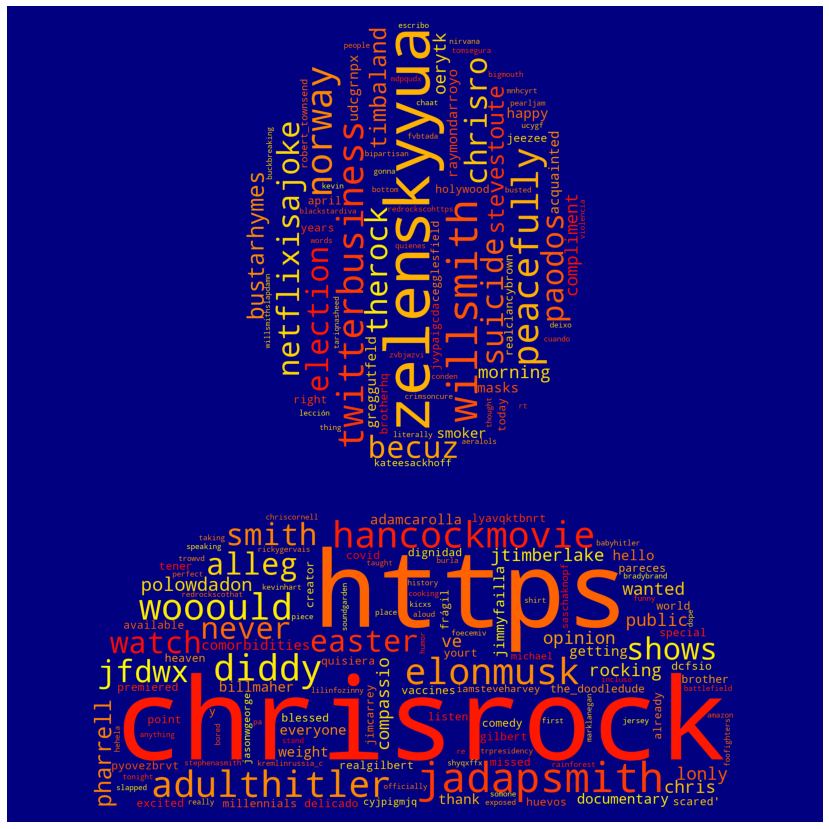

In [159]:
chris_listText = process_tweet(chris_tweets)
wordCloud(chris_listText)

*Cloud Word of the most uses Words*

### Jada Smith WordCloud

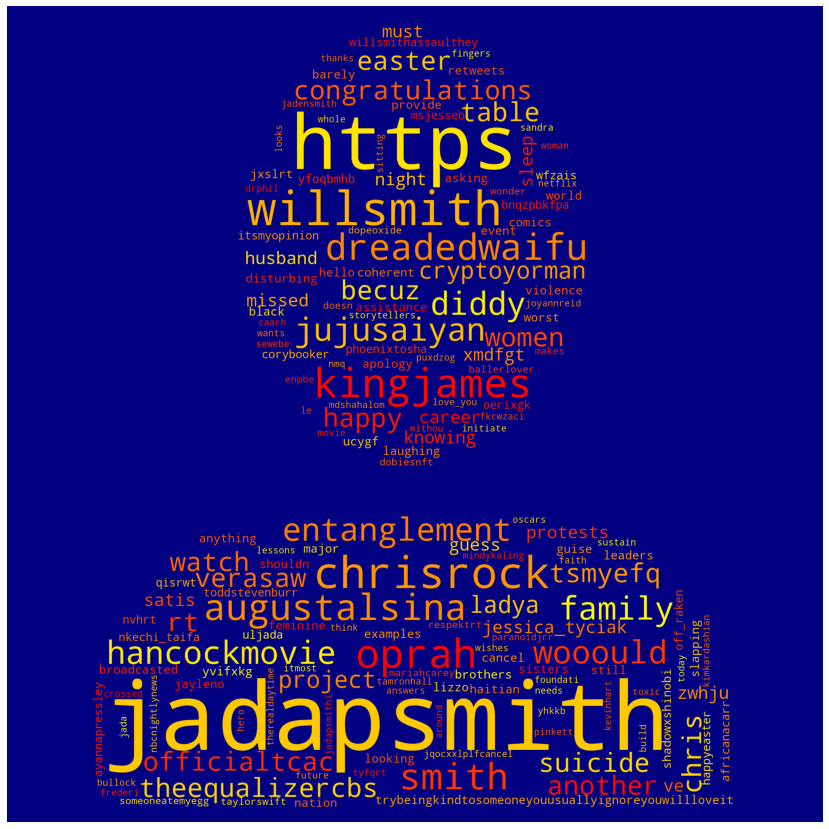

In [160]:
jada_listText = process_tweet(jada_tweets)
wordCloud(jada_listText)

*Cloud Word of the most uses Words*

### Kim Kardashian WordCloud

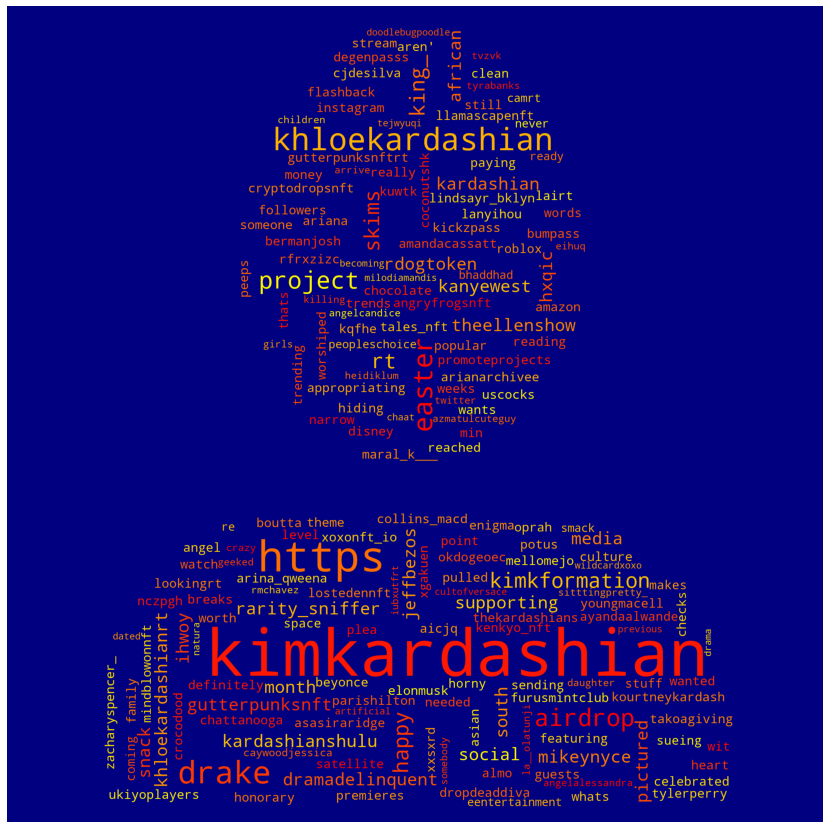

In [161]:
kim_listText = process_tweet(kim_tweets)
wordCloud(kim_listText)

*Cloud Word of the most uses Words*